In [1]:
from openket.core.diracobject import *
from openket.core.metrics import *
import numpy as np
import matplotlib.pyplot as plt

# Enredamiento de Formación y Concurrencia

Para un estado puro $\ket{\Phi}$ de un sistema biparita de qubits, el enredamiento se define como 
$$E(\Psi)=-\sum_i^nc_1^2 \log_2 c^2_i$$
donde los $c_i^2$ son los coeficientes de la descomposición de schmidt.

En cambio, al tratar con un estado mezcla $\rho$, no se tiene una única medida para el enredamiento. En un intento por cuantificar el enredamiento de un estado mezcla de un sistema bipartita, se han formulado tres principales medidas: el enredamiento de formación, el enredamiento de destilación y la entropía relativa de enredamiento. 
En este notebook se tratará sobre la concurrencia y su relación con el enredamiento por formación.
El enredamiento por formación $E_f$ de un estado mezcla $\rho$ está dado por 
$$E_f(\rho)=\text{inf}\,\sum_jp_jE(\Psi_j)$$
donde el ínfimo se toma sobre todas las descomposiciones posibles de $\rho$:
$$\rho=\sum_jp_j\ket{\Psi_j}\Bra{\Psi_j}$$

## Concurrencia de estados puros

Si bien, el enredamiento de formación tiene una buena motivación física, obtenerlo es complicado. Es por ello que usualmente se emplea otra cantidad que, aunque menos intuitiva, resulta más cómoda al momento de hacer cálculos: la _Concurrencia_. 
Considere un estado puro de dos qubits expresado en la base estándar como: 
$$\ket{\Psi}=a\ket{00}+b\ket{01}+c\ket{10}+d\ket{11}$$
La concurrencia se define como $C(\Psi)=2|ad-bc|$.
Esta nueva cantidad premite escribir el enredamiento de un estado puro como $E(\Psi)=\mathcal{E}(C(\psi))$, donde
$$\mathcal{E}(C)=h\left(\frac{1+\sqrt{1-C^2}}{2}\right)$$
$$h(x)=-x\log_2{x}-(1-x)\log_2{(1-x)}$$

La concurrencia se puede generalizar para estados puros de un sistema bipartita de qudits (sistemas cuánticos de dimesión $d\leq2$ ) como 
$$C(\Psi)=\sqrt{2\left(1-\text{tr}(\rho_A^2)\right)}$$
donde $0\leq C\leq1$. 

Esta fue una de las dos funciones que se programaron

Como primer ejemplo, considere el estado
$$\ket{\phi_1}=\ket{0}_A\ket{1}_B+\ket{1}_A\ket{1}_B$$
el cual, claramente es factorizable. Note que en este caso, no es necesario normalizar el estado pues la función se puede encargar de eso.
Al ser un estado factorizable, la concurrencia deberá ser cero.

In [2]:
phi1=Ket(0,'A')*Ket(1,'B')+Ket(1,'A')*Ket(1,'B')
print(PureConcurrence(phi1))

0


Por otro lado, si consideramos uno de los estados de Bell (no normalizados):
$$\ket{\Psi^+}=\ket{0}_A\ket{1}_B+\ket{1}_A\ket{0}_B$$

In [3]:
Psi=Ket(0,'A')*Ket(1,'B')+Ket(1,'A')*Ket(0,'B')
print(PureConcurrence(Psi))

1.00000000000000


Lo anterior tiene sentido, puesto que la concurrencia alcanza su máximo para estado máximamente enredados (justamente los estados de Bell).
Entonces, para cualquier otro estado (no factorizable, ni máximemente enredado), la concurrencia será mayor a cero y menor a uno. Considere como ejemplo el siguiente estado:
$$\ket{\phi_2}=\ket{0}_A\ket{0}_B+2\ket{1}_A\ket{0}_B+\ket{1}_A\ket{1}_B$$

In [4]:
phi2=Ket(0,'A')*Ket(0,'B')+2*Ket(1,'A')*Ket(0,'B')+Ket(1,'A')*Ket(1,'B')
print(PureConcurrence(phi2))

0.333333333461875


Finalmente, se muestra un ejemplo para calcular la concurrencia de un sistema de qutrits (dimensión $d=3$ ). El estado es:
$$\ket{\phi^{(3)}}=2\,\ket{0}_A\ket{1}_B+\ket{1}_A\ket{0}_B+3\,\ket{2}_A\ket{1}_B$$

In [5]:
phi3=2*Ket(0,'A')*Ket(1,'B')+Ket(1,'A')*Ket(0,'B')+3*Ket(2,'A')*Ket(1,'B')
print(PureConcurrence(phi3))

0.515078753591083


## Concurrencia de estados mezcla

Siguiendo la motivación para el enredamiento de formación, la concurrencia para estados mezcla se define como
$$C(\rho)=\text{inf} \sum_j p_j\,C(\Psi_j)$$
Por fortuna, la concurrencia tiene una fórmula exacta para el caso de un estado mezcla de quibits.
$$C(\rho)=\text{max}\{0,\lambda_1-\lambda_2-\lambda_3-\lambda_4\}$$
donde las $\lambda_i$'s son las raíces cuadradas de los eigernvalores de $\rho\tilde{\rho}$ en orden descendente. Dónde
$\tilde{\rho}=(\sigma_y\otimes \sigma_y)\rho^*(\sigma_y\otimes \sigma_y)$ es el operador conocido como _spin-flip_, con $\rho^*$ es el complejo conjugado de $\rho$

Como primer ejemplo, se calculará la concurrencia del estado 
$$\rho_1=\frac{1}{4}\,\ket{\phi_1}\bra{\phi_1}+\frac{3}{4}\,\ket{\phi_2}\bra{\phi_2}$$
donde $\ket{\phi_i}\, (i=1,2)$ son los estados puros (ahora normalizados) usados en los ejemplos mostrados arriba

In [6]:
Phi1=Normalize(phi1)
Phi2=Normalize(phi2)
rho1=(1/4)*Phi1*Adj(Phi1)+(3/4)*Phi2*Adj(Phi2)
print(rho1)

0.125000000000000|0_A>|1_B><1_B|<0_A| + 0.125000000000000|0_A>|1_B><1_B|<1_A| + 0.125000000000000|0_A>|0_B><0_B|<0_A| + 0.250000000000000|0_A>|0_B><0_B|<1_A| + 0.125000000000000|0_A>|0_B><1_B|<1_A| + 0.125000000000000|1_A>|1_B><1_B|<0_A| + 0.250000000000000|1_A>|1_B><1_B|<1_A| + 0.250000000000000|1_A>|0_B><0_B|<0_A| + 0.500000000000000|1_A>|0_B><0_B|<1_A| + 0.250000000000000|1_A>|0_B><1_B|<1_A| + 0.125000000000000|1_A>|1_B><0_B|<0_A| + 0.250000000000000|1_A>|1_B><0_B|<1_A|


In [7]:
print(MixConcurrence(rho1))

0.24999999972666964


Y como un último ejemplo compararemos la concurrencia de los estados
$$\rho_2=p\,\ket{\Psi^+}\Bra{\Psi^+}+(1-p)\,\ket{00}\bra{00}$$
$$\rho_3=p\,\ket{\Psi^+}\Bra{\Psi^+}+(1-p)\,\ket{00}\bra{11}$$
para diferentes valores de $p$

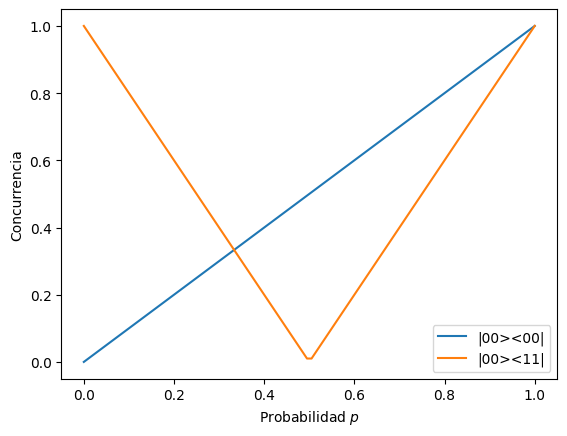

In [9]:
PSI=Normalize(Psi)*Adj(Normalize(Psi))
def Concurrencia2(p):
    estado=p*PSI+(1-p)*Ket(0,'A')*Ket(0,'B')*Bra(0,'A')*Bra(0,'B')
    return MixConcurrence(estado)
def Concurrencia3(p):
    estado=p*PSI+(1-p)*Ket(0,'A')*Ket(0,'B')*Bra(1,'A')*Bra(1,'B')
    return MixConcurrence(estado)
C1,C2=[],[]
P=np.linspace(0,1,100)
for p in P:
    C1.append(Concurrencia2(p))
    C2.append(Concurrencia3(p))
plt.plot(P,C1,label='|00><00|')
plt.plot(P,C2,label='|00><11|')
plt.xlabel('Probabilidad $p$' )
plt.ylabel('Concurrencia')
plt.legend()